# NumPy arrays

Nikolay Koldunov

koldunovn@gmail.com

This is part of [**Python for Geosciences**](https://github.com/koldunovn/python_for_geosciences) notes.

================

<img  height="100" src="files/numpy.png" >

-    a powerful N-dimensional array object
-    sophisticated (broadcasting) functions
-    tools for integrating C/C++ and Fortran code
-    useful linear algebra, Fourier transform, and random number capabilities


In [1]:
from numpy import *

In [2]:
set_printoptions(precision=3 , suppress= True) # this is just to make the output look better

In [3]:
set_printoptions??

## Load data

I am going to use some real data as an example of array manipulations. This will be the AO index downloaded by wget through a system call (you have to be on Linux of course):

In [1]:
!wget www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii

--2017-06-07 15:02:44--  http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii
Resolving www.cpc.ncep.noaa.gov... 140.90.101.63
Connecting to www.cpc.ncep.noaa.gov|140.90.101.63|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20225 (20K) [text/plain]
Saving to: ‘monthly.ao.index.b50.current.ascii’

monthly.ao.index.b5 100%[===================>]  19.75K  --.-KB/s    in 0.1s    

2017-06-07 15:02:46 (137 KB/s) - ‘monthly.ao.index.b50.current.ascii’ saved [20225/20225]



This is how data in the file look like (we again use system call for *head* command):

In [3]:
!head monthly.ao.index.b50.current.ascii

 1950    1  -0.60310E-01
 1950    2   0.62681E+00
 1950    3  -0.81275E-02
 1950    4   0.55510E+00
 1950    5   0.71577E-01
 1950    6   0.53857E+00
 1950    7  -0.80248E+00
 1950    8  -0.85101E+00
 1950    9   0.35797E+00
 1950   10  -0.37890E+00


Load data in to a variable:

In [4]:
ao = loadtxt('monthly.ao.index.b50.current.ascii')

In [5]:
ao

array([[ 1950.   ,     1.   ,    -0.06 ],
       [ 1950.   ,     2.   ,     0.627],
       [ 1950.   ,     3.   ,    -0.008],
       ..., 
       [ 2017.   ,     3.   ,     1.365],
       [ 2017.   ,     4.   ,    -0.089],
       [ 2017.   ,     5.   ,    -0.73 ]])

In [6]:
ao.shape  # array dimensions

(809, 3)

So it's a *row-major* order. Matlab and Fortran use *column-major* order for arrays.

In [7]:
type(ao) # type of object

numpy.ndarray

Numpy arrays are statically typed, which allow faster operations

In [8]:
ao.dtype # data type of array elements

dtype('float64')

In [9]:
ao[0,0]

1950.0

You can't assign value of different type to element of the numpy array:

In [10]:
ao[0,0] = 'Year'

ValueError: could not convert string to float: Year

Slicing works similarly to Matlab:

In [12]:
ao[0:5,:]

array([[ 1950.   ,     1.   ,    -0.06 ],
       [ 1950.   ,     2.   ,     0.627],
       [ 1950.   ,     3.   ,    -0.008],
       [ 1950.   ,     4.   ,     0.555],
       [ 1950.   ,     5.   ,     0.072]])

One can look at the data. This is done by matplotlib module and you have to start IPython with *--pylab inline* option to make it work:

In [13]:
import matplotlib.pyplot as plt

In [16]:
%matplotlib inline

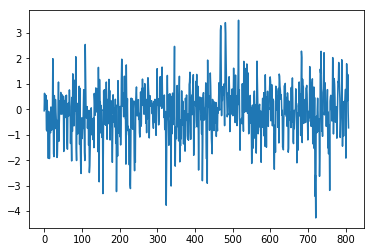

In [17]:
plt.plot(ao[:,2])

## Index slicing

In general it is similar to Matlab

First 12 elements of **second** column (months). Remember that indexing starts with 0:

In [18]:
ao[0:12,1]

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.])

First row:

In [19]:
ao[0,:]

array([ 1950.  ,     1.  ,    -0.06])

We can create mask, selecting all rows where values in second column (months) equals 10 (October):

In [20]:
mask = (ao[:,1]==10)

Here we apply this mask and show only first 5 rows of the array:

In [22]:
ao[mask][:5,:]

array([[ 1950.   ,    10.   ,    -0.379],
       [ 1951.   ,    10.   ,    -0.213],
       [ 1952.   ,    10.   ,    -0.437],
       [ 1953.   ,    10.   ,    -0.194],
       [ 1954.   ,    10.   ,     0.513]])

In [27]:
b=array([[1,2,3],[4,5,6]])

In [30]:
b[0, -3]

1

You don't have to create separate variable for mask, but apply it directly. Here instead of first five rows I show five last rows:

In [31]:
ao[ao[:,1]==10][-5:,:]

array([[ 2012.   ,    10.   ,    -1.514],
       [ 2013.   ,    10.   ,     0.263],
       [ 2014.   ,    10.   ,    -1.134],
       [ 2015.   ,    10.   ,    -0.25 ],
       [ 2016.   ,    10.   ,    -1.917]])

You can combine conditions. In this case we select October-December data (only first 10 elements are shown):

In [32]:
ao[(ao[:,1]>=10)&(ao[:,1]<=12)][0:10,:]

array([[ 1950.   ,    10.   ,    -0.379],
       [ 1950.   ,    11.   ,    -0.515],
       [ 1950.   ,    12.   ,    -1.928],
       [ 1951.   ,    10.   ,    -0.213],
       [ 1951.   ,    11.   ,    -0.069],
       [ 1951.   ,    12.   ,     1.987],
       [ 1952.   ,    10.   ,    -0.437],
       [ 1952.   ,    11.   ,    -1.891],
       [ 1952.   ,    12.   ,    -1.827],
       [ 1953.   ,    10.   ,    -0.194]])

## Basic operations

Create example array from first 12 values of second column and perform some basic operations:

In [33]:
months = ao[0:12,1]
months

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.])

In [34]:
months+10

array([ 11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.])

In [35]:
months*20

array([  20.,   40.,   60.,   80.,  100.,  120.,  140.,  160.,  180.,
        200.,  220.,  240.])

In [41]:
months*months

array([   1.,    4.,    9.,   16.,   25.,   36.,   49.,   64.,   81.,
        100.,  121.,  144.])

## Basic statistics

Create *ao_values* that will contain only data values:

In [42]:
ao_values = ao[:,2]

Simple statistics:

In [44]:
ao_values.min()

-4.2656999999999998

In [45]:
ao_values.max()

3.4952999999999999

In [46]:
ao_values.mean()

-0.11372779494437575

In [47]:
ao_values.std()

1.0064301740569916

In [48]:
ao_values.sum()

-92.005786109999988

You can also use *sum* function:

In [49]:
sum(ao_values)

-92.005786109999988

One can make operations on the subsets:

In [33]:
mean(ao[ao[:,1]==1,2]) # January monthly mean

-0.40406150000000002

In [55]:
ao[ao[:,1]==1][:,2]

array([-0.06 , -0.085,  0.368, -1.036, -0.148, -1.163, -1.204,  2.062,
       -1.438, -2.013, -2.484, -1.506,  1.645, -3.311,  0.385, -1.046,
       -3.232, -0.576, -0.409, -2.967, -2.412, -0.163,  0.167,  1.232,
        0.232,  1.595,  0.034, -3.767, -0.347, -2.233, -2.066, -0.116,
       -0.883,  1.359,  0.905, -2.806, -0.568, -1.148,  0.265,  3.106,
        1.001,  0.723,  0.55 ,  3.495, -0.288, -0.154, -1.2  , -0.457,
       -2.081,  0.11 ,  1.27 , -0.959,  1.381, -0.472, -1.686,  0.356,
       -0.17 ,  2.034,  0.819,  0.8  , -2.587, -1.683, -0.22 , -0.61 ,
       -0.969,  1.092, -1.449,  0.942])

Result will be the same if we use method on our selected data:

In [56]:
ao[ao[:,1]==1,2].mean()

-0.38593861764705878

## Saving data

You can save your data as a text file

In [57]:
savetxt('ao_only_values.csv',ao[:, 2], fmt='%.4f')

Head of resulting file:

In [37]:
!head ao_only_values.csv

-0.0603
0.6268
-0.0081
0.5551
0.0716
0.5386
-0.8025
-0.8510
0.3580
-0.3789


You can also save it as binary:

In [58]:
f=open('ao_only_values.bin', 'w')
ao[:,2].tofile(f)
f.close()